## Principal Component Analysis of additively manufactured 316L SS 
Written by Carl Strandby, Chalmers University of Technology, for a Project Course on data processing in Material's Science in 2023. Email: carstran@student.chalmers.se or carl.strandby@gmail.com

This Jupyter notebook demonstrates the application of Principal Component Analysis (PCA) to examine  multidimensional experimental data from Nanoindentation, Electron Backscattering Diffraction (EBSD) and Scanning Electron Microscopy (SEM) measurements made on additively manufactured stainless steel. The experimental data was collected by the author, Carl Strandby,
and Nicolò Maria della Ventura, University of California Santa Barbara, under the supervision of Professor Daniel Gianola, University of California Santa Barbara. The sample was produced by Masha Amiri and
Lorenzo Valdevit, from the Department of Materials Science and Engineering at University of California Irvine. 


### TODO: List

TODO: Add images from my personal laptop for comparison

---
## Notebook Overview
1. Experiment description

    A brief overview of how the experimental data was collected and the purpose of the experiment

2. Short introduction to PCA analysis

    An introduction to the theory behind Principal Component Analysis

3. Generating synthetic data from correlation matrices

    Some synthetic data is generated to emphasize how input parameters impact the outcome of PCA 


4. PCA on synthetic data

    An initial PCA analysis is performed on the synthetic data to stronglight how differences in input data impacts PCA results

5. PCA on experimental data

    The PCA is performed on experimental data

6. Comparison with previous findings and preliminary conclusions 

    A discussion on the results of the PCA made by comparison with previous findings

7. Future improvements

    Some thoughts about future improvements to the PCA methods and the analysis of the dataset

---
## Learning Outcomes
This notebook should give a basic understanding of Principal Component analysis and how it can be applied to examine multimodal experimental data. Emphasis is placed on the technical application of PCA and the interpretation of results.

---
## 1. Experiment Description

A sample made of 316L Stainless Steel was additively manufactured with Laser Powder Bed Fusion. The rapid cooldown of the material as the focused laser beam sweeps over the material leads to the formation of dislocation cells that can impede deformation, thereby increasing the material's hardness [Heterogeneous slip localization in an additively manufactured 316L stainless steel](https://doi.org/10.1016/j.ijplas.2022.103436). Within the material, crystallographic grains form, each with a specific plane orientation. Atoms tend to move in the planes with higher atom density, known as slip planes, whose orientation influences the material's hardness. Both the dislocation cells and the crystal orientation can be varied locally by adjusting laser parameters during manufacturing. Therefore, understanding the relationships between dislocation cells, crystal orientation and emergent material properties such as hardness and strain rate sensitivity might allow for greater ability to design for material's properties.

### A) Nanoindentation
First, a Nanoindentation experiment was made to record hardness at two high strain rates, 0.1 and 0.01 (with units of per second). The hardness recorded at the higher strain rate is higher than that of the lower strain rate and is thus referred to as Peak Hardness in this work. The hardness recorded at the lower strain rate is subsequently referred to as the Valley Hardness. The difference between these two values allow for the calculation of another property, the strain rate sensitivity. Furthermore, the strain rate sensitivity has a linear inverse relationship with another property called the Activation Volume, a pseudo measurement of the volume of the material that is affected by the indentation. The strain rate sensitivity and activation volumes were calculated as

\begin{equation}
m = \frac{\ln(H_{\text{Peak}}) - \ln(H_{\text{Valley}})}{\ln(S_1) - \ln(S_2)}
\end{equation}

and

\begin{equation}
V^* = \frac{3\sqrt{3}kT(\ln(S_1) - \ln(S_2))}{H_{\text{Peak}} - H_{\text{Valley}})},
\end{equation}

where $m$ is the strain rate sensitivity, $H$ hardness, $S$ strain rate, $kT$ the boltzmann constant times temperature. The factor $\sqrt{3}$ comes from shear stress acting on the slip plane is related to the applied normal stress due to the orientation of the slip system in an FCC crystal and the factor 3 comes from the Taylor factor, which accounts for the crystallographic orientation of grains and their influence on yield strength. In this work the four mechanical property features are labeled 'Peak Hardness', 'Valley Harndess', 'Strain Rate Sensitivity' and 'Activation Volume'.

![Alt text](image.png)

Figure 1: Schematic of nanoindentation sites on the parallel and perpendicular surfaces in relation to the build direction of the 316L SS sample.

### B) Scanning Electron Microscopy
Each of the aforementioned nanoindentations was "photographed" with a Scanning Electron Microscope. On the images one can identify the dislocation cells and a computer script was written to approximate the area of these cells. This feature is subsequently named 'Cell Area'.

### C) Electron Backscattering Diffraction
The nanoindentations was then subjected to a Electron Backscattering Diffraction experiment which measures the crystal orientation of the grain where the indentation is situated. The orientations of these were saved as Euler Angles and linked to the RGB values of an Inverse Pole Figure. The RGB values are labelled 'R Orientations [100]', 'B Orientations [111]' and 'G Orientations [101]'.

![Alt text](image-2.png)

Figure 2: An Inverse Pole Figure Colour Key showing how different colors represented as RGB-values relate to crystal orientation.

### D) Preliminary results and the purpose of PCA

In total, 300 indentations were made. The surface of the sample whose normal vector is perpendicular to the build direction is referred to as the perpendicular surface, as opposed to the parallel surface. Of the 300 indentations, 240 were made on the perpendicular and 60 on the parallel surface. The dataset examined later in this notebook contains 85 of these measurements as they were readily available, and in order to comply with requests to not share data outside an ongoing research project.

Preliminary examination of the experiment data showed a difference in mechanical properties between indentations made on the parallel and perpendicular surface. In particular it was found that both the hardness and dislocation cell area depended on the crystal orientation. However the results does not reveal how much of the measured hardness can be attributed to the crystal orientation as opposed to the increased obstacles from the dislocation cell area. The purpose of performing PCA on this dataset is to investigate what insights this method can provide into the origins of hardness.

![Alt text](image-1.png)

Figure 3: Inverse pole figures showing hardness and dislocation cell area distributions relative to crystal orientations for both parallel and perpendicular surfaces.

--- 
## 2. Short introduction to PCA analysis

Principal Component Analysis (PCA) is a statistical method used to reduce the complexity of high-dimensional datasets while preserving essential trends and patterns. A dataset is configured as a matrix where each row corresponds to a different measurement, and the columns represent various features associated with these measurements. In our case, we have nine features; four are mechanical properties measured with nanoindentation (Peak and Valley Hardnesses, Strain Rate Sensitivity, and Activation Volume), one is the dislocation cell area measured with SEM, and the last three features are the RGB values measured with EBSD, which together uniquely identify the crystal orientation. Additionally, the orientation of the elongation of these cells is included in the synthetic data as an introduced control correlation (set to zero with respect to all other features).

Before analysis, the dataset is standardized, ensuring each property has a mean of zero and a standard deviation of one. This ensures that the magnitudes or units don't influence PCA or regression results and allows for a fair comparison of variability across different feature types. A covarition matrix is then calculated from this standardized data matrix, quantifying the covariance between pairs of features. The eigenvalues and eigenvectors of this covariance matrix are key to PCA; eigenvalues indicate the amount of variance captured, and their corresponding eigenvectors point in the direction of maximum variance in the feature space. The principal components are the eigenvectors associated with the largest eigenvalues and are considered the most significant because they capture the most variance within the dataset. Typically, the two principal components with the highest eigenvalues are selected, but the number of components chosen can vary depending on the amount of variance one wishes to capture in the analysis. These principal components form a projection matrix that transforms data points from the original nine-dimensional feature space to a reduced two-dimensional principal component space. By plotting the data points in this new principal component space, one may be able to identify clusters, which can reveal intrinsic groupings in the data that may correspond to different classes or conditions within the dataset.

While PCA is a powerful tool, it also has some limitations. PCA assumes that the direction of maximum variance corresponds to the most informative features of the data, but in materials science certain critical behaviours might not be associated with large variances and would therefore not be reflected in the principal components.  Additionally, PCA is sensitive to the linear relationships between variables, but it does not capture non-linear dependencies, such as the strain rate sensitiviy and activation volume in this work. Nor does PCA account for uncertainties in the data, which could lead to overinterpretation of the components and limiting the precision of results to the quality of the examined dataset. Consequently, PCA should be used in conjunction with other analytical methods that compensate for these weaknesses to ensure a comprehensive understanding of a material's behavior.

---
## 3. Generating synthetic data from correlation matrices

In this section, we generate four distinct datasets, each based on a different template correlation matrix. These matrices, which are 9x9 in size due to our nine features, represent the degree of linear relationship between pairs of variables, with values ranging from -1 (perfect inverse correlation) to 1 (perfect positive correlation). A value of zero indicates no correlation. The first template correlation matrix is derived from values previously observed in the experimental data. However, to ensure positive definiteness, a requirement for PCA due to its reliance on real and non-negative eigenvalues, the correlations are slightly altered during data generation.

From this initial template, we create two additional matrices by rescaling the correlations with factors of 0.2 and 1.5, respectively, to explore the impact of varying correlation strengths on PCA. These scales are chosen to represent scenarios of mild and strong correlations. Additionally, we construct a random correlation matrix, with parameters set to emphasize a strong relationship between peak hardness and cell area, to observe how such predefined relationships influence the PCA results.
The synthetic datasets created from these matrices will allow us to demonstrate the effects of different correlation strengths and patterns on PCA, providing insights into the method's sensitivity to underlying data structures.

In [123]:
# Importing packages
#
####################################################################################################

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Packages used for the PCA analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


####################################################################################################
#
# Setting the standard plot style
#
####################################################################################################

def set_plot_style():
    
    """
    Description:
    Sets the plot style to a standard style that is suitable for LaTeX documents.
    
    Input:
    None
    
    Output:
    None
    
    """
    sns.set_context("paper", font_scale=1.5)
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    sns.set(font='sans-serif')
    %matplotlib inline
    
    # Figure sizes as increments of 3.5 usually works well in LaTeX documents
    fig_width  = 3.5
    fig_height = 3.5

    plt.rcParams['figure.figsize'] = (fig_width, fig_height)
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 4
    plt.rcParams['font.size'] = 2 * fig_width
    
    # Set grid lines off
    plt.rcParams['axes.grid'] = True

set_plot_style()

In [124]:
# Feature labels and correlation dictionary for setting up the data
#
####################################################################################################


def get_feature_labels():
    """
    Description:
    Returns all feature labels.
    
    Inputs:
    None
    
    Outputs:
    feature_labels (list): List of all feature labels.
    """
    
    feature_labels = [  'Peak Hardness', 'Valley Hardness', 'Strain Rate Sensitivity', 'Activation Volume', 
                        'Cell Area', 'Cell Orientation', 
                        'R Orientations [100]', 'B Orientations [111]', 'G Orientations [101]']
    
    return feature_labels


def get_ylabels_and_xfeatures():
    
    """
    Description:
    Returns all y-labels and x-features. y-labels are the features that are being predicted, and x-features are the features that are used to predict the y-labels.
    
    Inputs:
    None
    
    Outputs:
    y_labels (list): List of all y-labels.
    x_features (list): List of all x-features.
    
    """
    
    y_labels = ['Peak Hardness', 'Valley Hardness', 'Strain Rate Sensitivity', 'Activation Volume', 'Cell Area']
    x_features = ['Cell Area', 'R Orientations [100]', 'G Orientations [101]', 'B Orientations [111]']
    
    return y_labels, x_features


def get_feature_correlations_dictionary(label='UCSB'):
    
    """
    Description:
    Returns a dictionary of all feature correlations. The dictionary is in the form of a list of lists. The first element in each list is the feature label, and the second element is the correlation coefficient. Values are taken from the experimental data.
    
    Inputs:
    label (string): The label of the dataset. Currently, only 'UCSB' is supported.
    
    Outputs:
    feature_correlations_dictionary (dictionary): Dictionary of all feature correlations.
    
    """
    
    UCSB_feature_correlations_dictionary = {
            'Peak Hardness': [
                ['Valley Hardness', 0.991017], ['Strain Rate Sensitivity', -0.177720], ['Activation Volume', 0.185384], 
                ['Cell Area', -0.246230], ['Cell Orientation', 0.0], 
                ['R Orientations [100]', -0.337101], ['B Orientations [111]', 0.214413], ['G Orientations [101]', 0.123039]
            ],
            'Valley Hardness': [
                ['Strain Rate Sensitivity', -0.249063], ['Activation Volume', 0.275030],
                ['Cell Area', -0.250360], ['Cell Orientation', 0.0],
                ['R Orientations [100]', -0.316961], ['B Orientations [111]', 0.206216], ['G Orientations [101]', 0.137262]
            ],
            'Strain Rate Sensitivity': [
                ['Activation Volume', -0.876867], ['Cell Area', -0.364817], ['Cell Orientation', 0.0],
                ['R Orientations [100]', -0.152753], ['B Orientations [111]', -0.135896], ['G Orientations [101]', 0.233008]
            ],
            'Activation Volume': [
                ['Cell Area', 0.299301], ['Cell Orientation', 0.0],
                ['R Orientations [100]', 0.204768], ['B Orientations [111]', 0.055655], ['G Orientations [101]', -0.155258]
            ],
            'Cell Area': [
                ['Cell Orientation', 0.0],
                ['R Orientations [100]', 0.456469], ['B Orientations [111]', -0.221947], ['G Orientations [101]', -0.389518]
            ],
            'Cell Orientation': [
                ['R Orientations [100]', 0.0], ['B Orientations [111]', 0.0], ['G Orientations [101]', 0.0]
            ],
            'R Orientations [100]': [
                ['B Orientations [111]', -0.293377], ['G Orientations [101]', -0.265753]
            ],
            'B Orientations [111]': [
                ['G Orientations [101]', -0.121728]
            ],
            'G Orientations [101]': []
        }
    
    if label == 'UCSB':
        feature_correlations_dictionary = UCSB_feature_correlations_dictionary
        
    return feature_correlations_dictionary


def get_feature_ranges_dictionary(label='UCSB'):
        
    """
    Description:
    Returns a dictionary of all feature ranges. The dictionary is in the form of a list of lists. The first element in each list is the feature label, and the second element is the range of the feature. Values are taken from the experimental data.
    
    Inputs:
    label (string): The label of the dataset. Currently, only 'UCSB' is supported.
    
    Outputs:
    feature_ranges_dictionary (dictionary): Dictionary of all feature ranges.
    
    """
    
    feature_ranges =    {
                        'Peak Hardness': [2.2246747022274915, 3.1117079886206707],
                        'Valley Hardness': [2.0887969604933763, 3.09003398278258],
                        'Strain Rate Sensitivity': [0.0029853413716229, 0.0220698290186249],
                        'Activation Volume': [22.19808247463574, 165.5027393294077],
                        'Cell Area': [0.7078868410936741, 11.702396585653991],
                        'Cell Orientation': [0.0, 2 * np.pi],
                        'R Orientations [100]': [0.021338362830128244, 1.0],
                        'G Orientations [101]': [0.0029871217676131767, 1.0],
                        'B Orientations [111]': [0.02672209598902109, 1.0],
                    }

    return feature_ranges

def get_feature_units():
    
    """
    Description:
    Returns a dictionary of all feature units. The dictionary is in the form of a list of lists. The first element in each list is the feature label, and the second element is the unit of the feature. Values are taken from the experimental data.
    
    Inputs:
    None
    
    Outputs:
    feature_units (dictionary): Dictionary of all feature units.
    
    """
    
    feature_units = {
                        'Peak Hardness': 'GPa',
                        'Valley Hardness': 'GPa',
                        'Strain Rate Sensitivity': '1/s',
                        'Activation Volume': 'b^3',
                        'Cell Area': 'b^2',
                        'Cell Orientation': 'radians',
                        'R Orientations [100]': '1',
                        'G Orientations [101]': '1',
                        'B Orientations [111]': '1',
                    }
    
    return feature_units
    

In [125]:
# Functions for generating data and correlation matrices
#
####################################################################################################


def get_feature_correlations(random = False, seed = None):
    
    """
    
    Description:
    Returns the feature correlation matrix and feature labels. The feature correlation matrix is generated from the feature correlations dictionary. If random is set to True, the feature correlation matrix is randomly generated.
    
    Inputs:
    random (boolean): Whether or not to randomly generate the feature correlation matrix.
    seed (int): Seed for the random number generator.
    
    Outputs:
    feature_correlation_matrix_true (pandas dataframe): Feature correlation matrix.
    feature_labels (list): List of all feature labels.
    
    """
    
    
    feature_labels = get_feature_labels()
    
    feature_correlations_dictionary = get_feature_correlations_dictionary()
    
    
    feature_correlation_matrix_true = np.zeros((len(feature_labels), len(feature_labels)))
    
    np.random.seed(seed)
    for idx, feature in enumerate(feature_labels):
        for correlation in feature_correlations_dictionary[feature]:
            feature_correlation_matrix_true[idx, feature_labels.index(correlation[0])] = correlation[1]
            feature_correlation_matrix_true[feature_labels.index(correlation[0]), idx] = correlation[1]
        
            if random:
                random_number = np.random.uniform(-1, 1)
                
                # Set the control correlation to 1
                if feature == 'Peak Hardness' and correlation == 'Cell Area':
                    random_number = 1
                    
                feature_correlation_matrix_true[idx, feature_labels.index(correlation[0])] = random_number
                feature_correlation_matrix_true[feature_labels.index(correlation[0]), idx] = random_number
        
        
        if feature_correlation_matrix_true[idx, idx] == 0:
            feature_correlation_matrix_true[idx, idx] = 1
    
    feature_correlation_matrix_true = pd.DataFrame(feature_correlation_matrix_true, columns=feature_labels, index=feature_labels)
    
    return feature_correlation_matrix_true, feature_labels


def generate_feature_data(feature_correlation_matrix, feature_ranges, n_datapoints=1000, n_sigma=3):
    
    """
    Description:
    Generates feature data from a feature correlation matrix and feature ranges. The feature data is generated by first generating standard normally distributed data, and then transforming it to match the feature correlation matrix and feature ranges.
    
    Inputs:
    feature_correlation_matrix (pandas dataframe): Feature correlation matrix.
    feature_ranges (dictionary): Dictionary of all feature ranges.
    n_datapoints (int): Number of datapoints to generate.
    n_sigma (int): Number of standard deviations to assume for the data. Default is 3 (99.7% of data falls within min and max).
    
    Outputs:
    feature_data (pandas dataframe): Feature data.
        
    """
    
    
    # Calculate the covariance matrix from the correlation matrix and standard deviations
    std_devs = [np.sqrt(feature_ranges[label][1] - feature_ranges[label][0]) / n_sigma for label in feature_correlation_matrix.columns]
    covariance_matrix = np.diag(std_devs).dot(feature_correlation_matrix).dot(np.diag(std_devs))
    
    # Generate standard normally distributed data
    std_normal_data = np.random.randn(n_datapoints, len(feature_correlation_matrix))
    
    # Cholesky decomposition of covariance matrix and transformation to ensure feature matrix is matched
    cholesky_decomp = np.linalg.cholesky(covariance_matrix)
    correlated_data = std_normal_data.dot(cholesky_decomp.T)

    feature_data = pd.DataFrame(correlated_data, columns=feature_correlation_matrix.columns)
    
    # Rescale and shift the data to have the correct min and max for each feature
    for feature in feature_ranges:
        min_val, max_val = feature_ranges[feature]
        feature_data[feature] = feature_data[feature] * (max_val - min_val) / (2 * n_sigma) + (max_val + min_val) / 2

    return feature_data



def get_new_correlation_matrix(feature_correlation_matrix_true, feature_ranges, min_value=0., max_value=1):
    
    """
    Description:
    Generates a new correlation matrix from a feature correlation matrix and feature ranges. The new correlation matrix is generated by multiplying the feature correlation matrix by a random matrix of the same size. The random matrix is generated by first generating a random matrix of the same size, and then transforming it to be positive definite.
    
    Inputs:
    feature_correlation_matrix_true (pandas dataframe): Feature correlation matrix.
    feature_ranges (dictionary): Dictionary of all feature ranges.
    min_value (float): Minimum value of the new correlation matrix.
    max_value (float): Maximum value of the new correlation matrix.
    
    Outputs:
    new_correlation_matrix (pandas dataframe): New correlation matrix.
    new_feature_data (pandas dataframe): New feature data.
        
    """
    
    
    feature_labels = feature_correlation_matrix_true.columns
    
    correlations_factors = get_correlation_factors(len(feature_labels), min_value=min_value, max_value=max_value)
    
    new_correlation_matrix = feature_correlation_matrix_true.copy() * correlations_factors
    
    new_correlation_matrix = make_positive_definite(new_correlation_matrix)
    
    new_correlation_matrix = pd.DataFrame(new_correlation_matrix, columns=feature_labels, index=feature_labels)
    
    new_feature_data = generate_feature_data(new_correlation_matrix, feature_ranges)
    
    return new_correlation_matrix, new_feature_data


def get_random_correlation_matrix(feature_labels):
    
    """
    Description:
    Generates a random correlation matrix from a list of feature labels. The random correlation matrix is generated by first generating a random matrix of the same size, and then transforming it to be positive definite.
    
    Inputs:
    feature_labels (list): List of all feature labels.
    
    Outputs:
    random_correlation_matrix (pandas dataframe): Random correlation matrix.
    feature_data_random (pandas dataframe): Random feature data.
        
    """
    
    random_correlations_matrix, _ = get_feature_correlations(random=True, seed=11)

    feature_ranges_random = get_feature_ranges_dictionary(label='UCSB')

    random_correlations_matrix = make_positive_definite(random_correlations_matrix)

    random_correlations_matrix = pd.DataFrame(random_correlations_matrix, columns=feature_labels, index=feature_labels)

    feature_data_random = generate_feature_data(random_correlations_matrix, feature_ranges_random)
    
    return random_correlations_matrix, feature_data_random



def get_correlation_factors(n_features, min_value=0., max_value=1., seed=42):
    
    """
    Description:
    Generates a randomly perturbed feature matrix of the same size as the feature correlation matrix. The random matrix is generated by first generating a random matrix of the same size, and then transforming it to be positive definite.
    
    Inputs:
    n_features (int): Number of features.
    min_value (float): Minimum value of the new correlation matrix.
    max_value (float): Maximum value of the new correlation matrix.
    
    Outputs:
    correlations_factors (numpy array): Randomly perturbed feature matrix.
        
    """
    
    np.random.seed(seed)
    correlations_factors = np.random.rand(n_features, n_features)

    scale = max_value - min_value
    offset = min_value
    
    correlations_factors = correlations_factors * scale + offset
    correlations_factors = np.triu(correlations_factors, 1)
    correlations_factors += correlations_factors.T
    correlations_factors += np.eye(n_features)
    
    return correlations_factors


def make_positive_definite(correlation_matrix):
    """
    Description:
    Transforms a matrix to be positive definite. Note that this function does not preserve the underlying correlation structure of the matrix.
    
    Inputs:
    correlation_matrix (numpy array): Matrix to be transformed.
    
    Outputs:
    correlation_matrix (numpy array): Transformed matrix.
        
    """
    
    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
    
    eigenvalues = np.abs(eigenvalues)
    
    correlation_matrix = eigenvectors.dot(np.diag(eigenvalues)).dot(eigenvectors.T)
    
    return correlation_matrix


In [126]:
# Function to plot the correlation matrix
#
####################################################################################################

def plot_correlation_heatmap(feature_matrix, labels = None):
    """
    Description:
    Plots the correlation matrix of a feature matrix. If the feature matrix is a list of feature matrices, then multiple correlation matrices are plotted. If the feature matrix is a pandas dataframe with generated data, then the correlations are calculated as well.
    
    Inputs:
    feature_matrix (pandas dataframe or list): Feature matrix.
    labels (list): List of labels for each feature matrix.
    
    Outputs:
    None
    """

    if isinstance(feature_matrix, pd.DataFrame):
        fig, ax = plt.subplots(figsize=(7, 7))
        
        # Compute the correlation matrix
        correlation_matrix = feature_matrix.corr()

        # Plot the heatmap
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1)
        ax.set_title(f'Feature Correlation Matrix' + (f' ({labels})' if labels is not None else ''))
        fig.tight_layout()
        plt.show()
    
    # Check if array or list
    elif isinstance(feature_matrix , (list)):
        n_matrices = len(feature_matrix)
        fig, ax = plt.subplots(1, n_matrices, figsize=(5 * n_matrices, 5))
        
        for idx, matrix in enumerate(feature_matrix):
            feature_labels = matrix.columns
            # Compute the correlation matrix
            correlation_matrix = np.corrcoef(matrix, rowvar=False)

            # Plot the heatmap
            sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", vmin=-1, vmax=1, ax=ax[idx], xticklabels=feature_labels, yticklabels=feature_labels)
            ax[idx].set_title(labels[idx])
        fig.suptitle('Feature Correlation Matrices', fontsize=16)
        fig.tight_layout()
        plt.show()
    
    else:
        print('Error: feature_matrix must be a pandas DataFrame, or list of pandas DataFrames')
        return



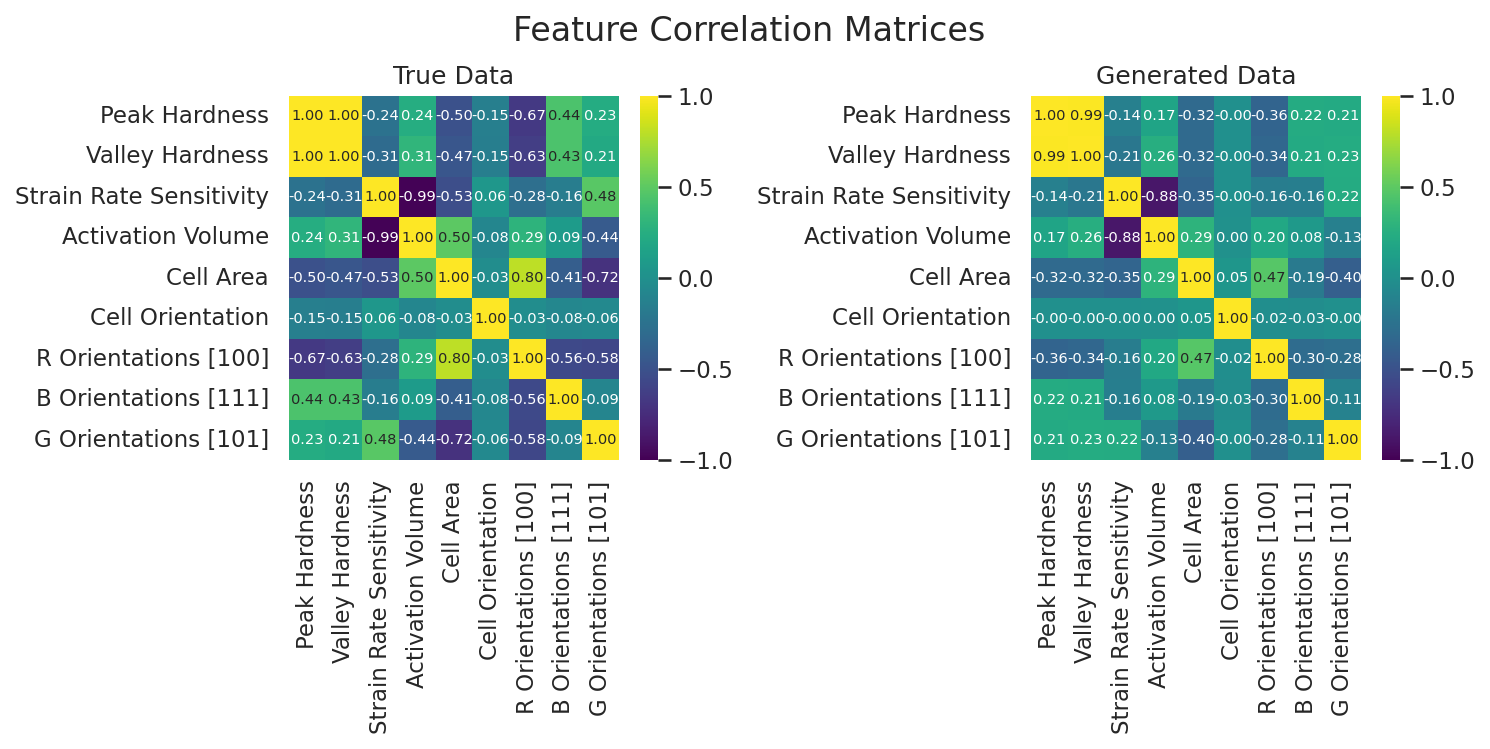

In [127]:
# Generate the true correlation matrix template from experimental data and compare to generated data
#
###############################################################################

feature_correlation_matrix_true, feature_labels = get_feature_correlations()

feature_ranges = get_feature_ranges_dictionary()

feature_data_true = generate_feature_data(feature_correlation_matrix_true, feature_ranges)

plot_correlation_heatmap([feature_correlation_matrix_true, feature_data_true], labels=['True Data', 'Generated Data'])

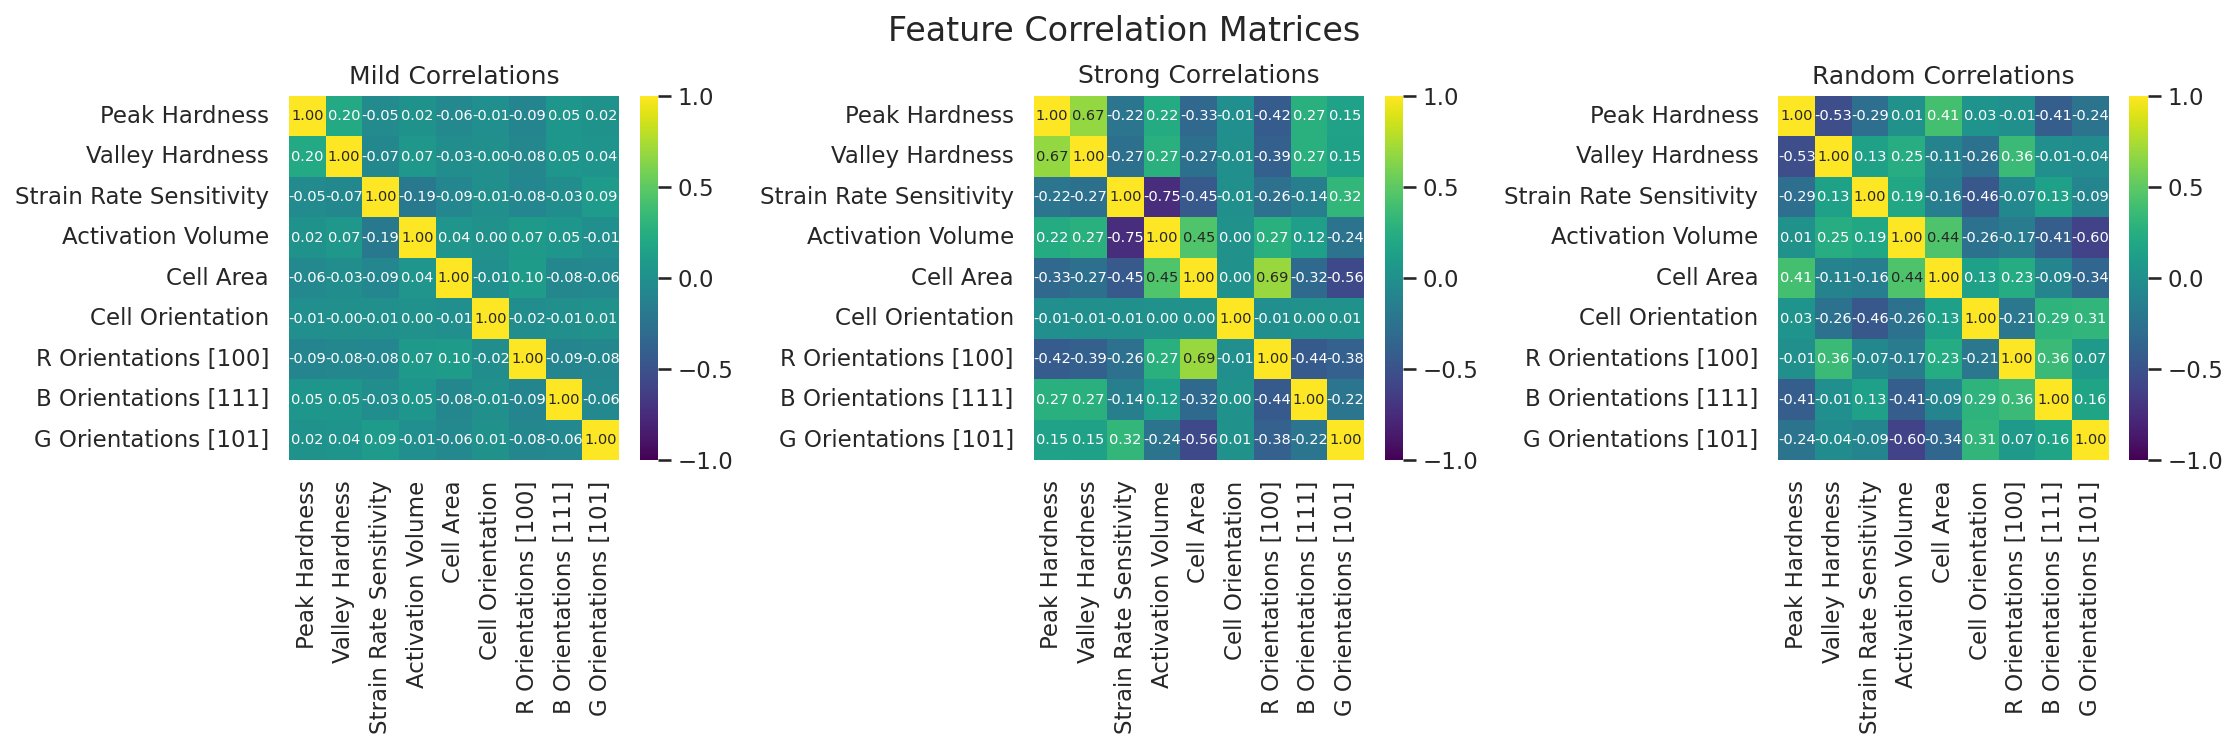

In [128]:
# Generate new correlation matrices by rescaling the true correlation matrix and generating a random correlation matrix
#
###############################################################################


# These attempt to maintain the same correlation values as the original data
mild_correlations_matrix, feature_data_mild = get_new_correlation_matrix(feature_correlation_matrix_true, feature_ranges, min_value=0.2, max_value=0.2)
strong_correlations_matrix, feature_data_strong = get_new_correlation_matrix(feature_correlation_matrix_true, feature_ranges, min_value=1.5, max_value=1.5)

 
random_correlations_matrix, feature_data_random = get_random_correlation_matrix(feature_labels)

    
plot_correlation_heatmap([feature_data_mild, feature_data_strong, feature_data_random], labels = ['Mild Correlations', 'Strong Correlations', 'Random Correlations'])


---
## 4. PCA on synthetic data

### A) The PCA algorithm

Firstly, we standardize the data to ensure each feature has a mean of zero and a standard deviation of one. This process ensures that differences in value ranges or units do not influence the PCA or regression results. After standardization, PCA is applied using scikit-learn's PCA package, which computes the principal components for our data. Two principal components are selected for analysis, in line with the theory outlined in the 'A Short Introduction to PCA' chapter. The resulting PCA matrix contains two columns for the two principal components and a row for each datapoint.

To evaluate the effectiveness of PCA, we assess the variance captured by each component. Typically, a good PCA model captures between 70-95% of the total data variance, depending on the specific context of the analysis.

A biplot is then created, combining a scatter plot of the data points in the principal component space (colored relative to a property like peak hardness) with the feature vectors. This visualization is interpreted by examining the magnitudes of feature vectors, with larger magnitudes indicating greater contribution to the principal components. For instance, our control property, the Cell Orientation, ends up very close to the origin, implying a lesser contribution, whereas emergent mechanical properties are farther from the origin, signifying a greater contribution. Additionally, angular relationships between feature vectors are analyzed to infer correlations; vectors with a small angular difference are positively correlated, while vectors in opposite directions suggest negative correlation. Orthogonal vectors are considered close to unrelated. However, it's important to note that the correlation between a target vector and other vectors is not solely determined by angular differences; a larger vector with a larger angular difference can still have a larger projection on the target vector if its magnitude is sufficiently large.

The projection magnitudes of features on mechanical property vectors, such as 'Peak Hardness' and 'Valley Hardness,' are therefore also calculated. These magnitudes, along with linear regression coefficients derived from scikit-learn's LinearRegression module, provide insight into feature relationships in the original nine-dimensional space and are visualized in a horizontal barchart. This comparison also includes correlation coefficients from creating a covariation matrix directly from the data.

Next, the PCA is applied to datasets with varying correlation strengths (strong and mild) and random correlation structures, including the synthetic data. By comparing these analyses, we aim to glean insights into how correlation patterns affect PCA outcomes and discuss these findings in depth.

In [129]:
# PCA functions
#
###############################################################################

def standardize_data(feature_data):
    
    """
    Description:
    Standardizes the feature data. This is done by subtracting the mean and dividing by the standard deviation. If models created from the standardized data are to be used to predict the original data, then the original data must be standardized or predictions destandardized using the same scaler.
    
    Inputs:
    feature_data (pandas dataframe): Feature data.
    
    Outputs:
    feature_data_standardized (pandas dataframe): Standardized feature data.
    feature_scaler (sklearn StandardScaler object): Scaler used to standardize the data.
    
    """
    
    feature_scaler = StandardScaler()

    feature_data_standardized = feature_scaler.fit_transform(feature_data)
    
    feature_data_standardized = pd.DataFrame(feature_data_standardized, columns=feature_data.columns)
    
    return feature_data_standardized, feature_scaler


def sklearn_PCA(feature_data_standardized):
    
    """
    Description:
    Performs PCA on the standardized feature data using the scikit-learn PCA object. The number of components is set to 2.
    
    Inputs:
    feature_data_standardized (pandas dataframe): Standardized feature data.
    
    Outputs:
    pca_matrix (pandas dataframe): PCA matrix.
    pca (sklearn PCA object): PCA object.
    
    """
    
    pca = PCA(n_components=2)
    pca_matrix = pca.fit_transform(feature_data_standardized)
    pca_matrix = pd.DataFrame(pca_matrix, columns=['PC1', 'PC2'])
    
    return pca_matrix, pca


def get_loadings(pca, n_PCA_components=2, n_features=9):
    
    """
    Description:
    Returns the loadings from PCA. The loadings are the eigenvectors multiplied by the square root of the eigenvalues. The loadings are used to determine the contribution of each feature to each principal component.
    
    Inputs:
    pca (sklearn PCA object): PCA object.
    n_PCA_components (int): Number of PCA components.
    n_features (int): Number of features.
    
    Outputs:
    loadings (numpy array): Loadings.
    
    """

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
        
    return loadings[:, :n_PCA_components]


def examine_variances(pca=None, eigenvalues=None, pca_method_label='PCA'):
    
    """
    Description:
    Examines the variances of the PCA components. The variances are the eigenvalues of the covariance matrix. The explained variance ratio is the ratio of the eigenvalues to the sum of the eigenvalues.
    
    Inputs:
    pca (sklearn PCA object): PCA object.
    eigenvalues (numpy array): Eigenvalues.
    pca_method_label (string): Label for the PCA method.
    
    Outputs:
    None
    
    """
    
    # Use the explained variance ratio from the scikit-learn PCA object
    explained_variance_ratio = pca.explained_variance_ratio_
    
    print(f'{pca_method_label} Explained Variance Ratio: {explained_variance_ratio}')
    print(f'{pca_method_label} Explained Variance Ratio Sum: {sum(explained_variance_ratio)}')
    
 

In [130]:
# Correlation coefficient functions; linear regression, PCA projection magnitudes, and feature correlation values
#
###############################################################################


def get_linear_regression_coefficients(feature_data):
    """
    Description:
    Performs linear regression on the feature data. The features are used to predict each property. The coefficients are normalized to the maximum absolute value for each property.
    
    Inputs:
    feature_data (pandas dataframe): Feature data.
    
    Outputs:
    result_df (pandas dataframe): Dataframe of coefficients with columns ['Property', 'Feature', 'Coefficient', 'Relative Coefficient'].
    
    """
    
    # Specify properties to fit to and features to use
    y_labels, x_features = get_ylabels_and_xfeatures()
    
    # Perform linear regression for each property
    coefficients_list = []
    for y_label in y_labels:
        
        # Fit the model
        X = feature_data[x_features]
        y = feature_data[y_label]
        model = LinearRegression().fit(X, y)

        # Store results in list
        coefficients = list(model.coef_)
        
        # Normalize coefficients to the maximum absolute value for this y_label
        max_coefficient = max(abs(coefficient) for coefficient in coefficients)
        normalized_coefficients = [coeff / max_coefficient for coeff in coefficients]
        
        # Append the results to the overall list
        coefficients_list.extend([(y_label, feature, coeff, norm_coeff) for feature, coeff, norm_coeff in zip(x_features, coefficients, normalized_coefficients)])

    # Remove the row for Cell Area, Cell Area
    coefficients_list = [coeff for coeff in coefficients_list if coeff[0] != coeff[1]]
    
    # Convert the list to DataFrame
    result_df = pd.DataFrame(coefficients_list, columns=['Property', 'Feature', 'Coefficient', 'Relative Coefficient'])
    
    return result_df



def get_PCA_projection_magnitudes(feature_data, loadings):
    
    """
    Description:
    Calculates the PCA projection magnitudes. The PCA projection magnitudes are the scalar products of the loading vectors for each property and feature. The coefficients are normalized to the maximum absolute value for each property.
    
    Inputs:
    feature_data (pandas dataframe): Feature data.
    loadings (numpy array): Loadings.
    
    Outputs:
    result_df (pandas dataframe): Dataframe of coefficients with columns ['Property', 'Feature', 'Coefficient', 'Relative Coefficient'].
    
    """
    
    # Specify properties to fit to and features to use
    y_labels, x_features = get_ylabels_and_xfeatures()
    
    # Calculate the scalar products of the loading vectors for each property and feature
    all_projection_magnitudes = []

    # Loop over each property
    for y_label in y_labels:
        # Get the location of the y_label in the feature_data columns
        y_label_loc = feature_data.columns.get_loc(y_label)

        # Loop over each feature
        projection_magnitudes = []
        for feature_name in x_features:
            # Get the location of the feature_name in the feature_data columns
            feature_name_loc = feature_data.columns.get_loc(feature_name)
            
            # Calculate the scalar product of the loading vectors for the y_label and feature_name
            scalar_product = np.dot(loadings[y_label_loc], loadings[feature_name_loc])

            # Store the result for this y_label
            projection_magnitudes.append((y_label, feature_name, scalar_product))
        
        # Calculate the relative coefficients for this y_label
        max_magnitude = max(abs(magnitude) for _, _, magnitude in projection_magnitudes)
        
        # Normalize the magnitudes to the maximum absolute value for this y_label
        normalized_magnitudes = [(y_label, feature_name, magnitude, magnitude / max_magnitude) for y_label, feature_name, magnitude in projection_magnitudes]

        # Append the results to the overall list
        all_projection_magnitudes.extend(normalized_magnitudes)

    # Remove the row for Cell Area, Cell Area
    all_projection_magnitudes = [magnitude for magnitude in all_projection_magnitudes if magnitude[0] != magnitude[1]]
    
    # Convert the list to DataFrame
    result_df = pd.DataFrame(all_projection_magnitudes, columns=['Property', 'Feature', 'Coefficient', 'Relative Coefficient'])
    
    return result_df



def get_feature_correlation_values(feature_data):
    """
    Description:
    Calculates the feature correlation values. The feature correlation values are the correlation coefficients between each property and feature. The coefficients are normalized to the maximum absolute value for each property.
    
    Inputs:
    feature_data (pandas dataframe): Feature data.
    
    Outputs:
    result_df (pandas dataframe): Dataframe of coefficients with columns ['Property', 'Feature', 'Coefficient', 'Relative Coefficient'].
    
    """
    
    # Specify properties to fit to and features to use
    y_labels, x_features = get_ylabels_and_xfeatures()
    
    
    # Compute the correlation matrix
    correlation_matrix = feature_data.corr()

    # Calculate the correlation coefficients for each y_label and x_feature
    correlation_values = []
    for y_label in y_labels:
        for x_feature in x_features:
            
            # Check if both y_label and x_feature are in the columns of the correlation matrix
            if y_label in correlation_matrix.columns and x_feature in correlation_matrix.columns:
                coefficient = correlation_matrix.loc[y_label, x_feature]
                
                # Store the result
                correlation_values.append((y_label, x_feature, coefficient))

    # Calculate the relative coefficients per y_label
    normalized_correlation_values = []
    for y_label in y_labels:
        
        # Get the correlation values for this y_label
        y_label_correlations = [(label, feature, coeff) for label, feature, coeff in correlation_values if label == y_label]
        
        # Calculate the relative coefficients for this y_label
        max_coefficient = max(abs(coefficient) for _, _, coefficient in y_label_correlations)
        
        # Append the results to the overall list
        normalized_correlation_values.extend([(label, feature, coeff, coeff / max_coefficient) for label, feature, coeff in y_label_correlations])

    # Remove the row for Cell Area, Cell Area
    normalized_correlation_values = [value for value in normalized_correlation_values if value[0] != value[1]]
    
    # Convert the list to DataFrame
    result_df = pd.DataFrame(normalized_correlation_values, columns=['Property', 'Feature', 'Coefficient', 'Relative Coefficient'])
    
    return result_df

In [131]:
# Functions for plotting PCA and regression results
#
###############################################################################


def create_biplot(pca_matrix, feature_matrix, loadings, colorbar_property = 'Peak Hardness', pca=None, threshold=0.1, vector_scale=4, data_label=None, fig = None, ax = None):
    
    """
    Description:
    Creates a biplot of the PCA results. The biplot shows the PCA projection magnitudes as vectors, scaled by the specified vector scale. The vectors are labeled with the feature names. The colorbar property is used to color the points in the scatter plot.
    
    Inputs:
    pca_matrix (pandas dataframe): PCA matrix.
    feature_matrix (pandas dataframe): Feature matrix.
    loadings (numpy array): Loadings.
    colorbar_property (string): Property to use for the colorbar.
    pca (sklearn PCA object): PCA object.
    threshold (float): Threshold for the vector magnitude. Vectors with magnitude below the threshold are not plotted.
    vector_scale (float): Scaling factor for the vectors.
    data_label (string): Label for the data.
    fig (matplotlib figure): Figure to plot on.
    ax (matplotlib axis): Axis to plot on.
    
    Outputs:
    None
    
    """
    
    # Create a new figure if one is not provided
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))
    
    # Create a colorbar for the scatter plot
    cmap = 'Blues' 
    color = feature_matrix[colorbar_property]
    vmin, vmax = min(color), max(color)
    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    
    colorbar_unit = get_feature_units()[colorbar_property]
    cbar.set_label('Relative ' + colorbar_property + f' [{colorbar_unit}]')
    
    
    tick_values = np.linspace(vmin, vmax, 5)
    tick_labels = np.linspace(0, 1, 5) 
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels([f'{tick_label:.2f}' for tick_label in tick_labels])
    
    # Scatter points colored by the colorbar property
    ax.scatter(pca_matrix['PC1'], pca_matrix['PC2'], alpha=0.5, c=color, cmap=cmap, norm=norm)
    
    # Plot the loadings as vectors, scaled and labeled based on the threshold
    for i, varname in enumerate(feature_matrix.columns):
        
        # Apply the scaling factor to the vectors
        loading_scaled = loadings[i] * vector_scale
        
        # Only add labels to vectors with magnitude above the threshold
        if np.linalg.norm(loading_scaled) > threshold:
            ax.arrow(0, 0, loading_scaled[0], loading_scaled[1], color='r', alpha=0.7, linewidth=2, head_width=0.2)
            ax.text(loading_scaled[0]*1.1, loading_scaled[1]*1.1, varname, color='k', ha='center', va='center', fontsize=10)
    
    # Set the aspect ratio of the plot to be equal
    ax.set_aspect('equal')
    
    # Set labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'Biplot of PCA for Feature Matrix' + (f' ({data_label})' if data_label is not None else '') + '\n' + f'Feature vectors standardized and scaled by {vector_scale}')
    ax.grid(True)
    
    fig.tight_layout()
    
    if fig is None or ax is None:
        # Show the plot
        plt.show()
    


def plot_regression_coefficients(coefficients_df, coefficient_label='Coefficient', method_label = 'Linear Regression', data_label=None, fig = None, ax = None):

    """
    Description:
    Plots the regression coefficients. The coefficients are normalized to the maximum absolute value for each property.
    
    Inputs:
    coefficients_df (pandas dataframe): Dataframe of coefficients with columns ['Property', 'Feature', 'Coefficient', 'Relative Coefficient'].
    coefficient_label (string): Label for the coefficients.
    method_label (string): Label for the method.
    data_label (string): Label for the data.
    fig (matplotlib figure): Figure to plot on.
    ax (matplotlib axis): Axis to plot on.
    
    Outputs:
    None
        
    """
    
    if fig is None or ax is None:
        # Create a new figure
        fig, ax = plt.subplots(figsize=(7, 7))
    
    # Define a custom color palette for the specified feature names
    sns_color_palette = sns.color_palette()
    custom_palette = {
    'Cell Area': sns_color_palette[1],           # A Orange
    'R Orientations [100]': sns_color_palette[3],  # Red
    'G Orientations [101]': sns_color_palette[2],  # Green
    'B Orientations [111]': sns_color_palette[0]  # Blue
    }
    
    # Plot the relative coefficients
    sns.barplot(x=coefficient_label, y='Property', hue='Feature', data=coefficients_df, ax=ax, palette = custom_palette)
    
    ax.set_xlabel(coefficient_label + ' Value')
    ax.legend(loc='lower left')
    
    # Set the title
    ax.set_title(coefficient_label +'s from '+ method_label + (f' ({data_label})' if data_label is not None else '') + '\n' + 'Coefficients from normalized data')
    
    fig.tight_layout()
    
    if fig is None or ax is None:
        # Show the plot
        plt.show()
        
    

In [132]:
# Algorithm to analyze feature data
#
###############################################################################

def run_analysis_on_feature_data(feature_data, data_label, biplot_colorbar_property = 'Peak Hardness', regression_coefficient_label='Coefficient'):
    
    """
    Description:
    Runs the analysis on feature data. The analysis consists of PCA, PCA projection magnitudes, linear regression, and correlation matrix. The results are plotted.
    
    Possible biplot colorbar properties: 'Peak Hardness', 'Valley Hardness', 'Strain Rate Sensitivity', 'Activation Volume'
    Possible regression coefficient labels: 'Coefficient', 'Relative Coefficient'
    
    Inputs:
    feature_data (pandas dataframe): Feature data.
    data_label (string): Label for the data.
    biplot_colorbar_property (string): Property to use for the colorbar in the biplot.
    regression_coefficient_label (string): Label for the regression coefficients.
    
    Outputs:
    None
    
    """
    
    # Print the number of datapoints
    print(f'Analyzing {data_label}, {feature_data.shape[0]} datapoints')
    
    
    # Standardize the data
    feature_data_standardized, feature_scaler = standardize_data(feature_data)
    
    
    # Perform PCA
    pca_matrix, pca = sklearn_PCA(feature_data_standardized)

        
    # Examine the variances
    examine_variances(pca=pca, pca_method_label='Sklearn')

        
    # Get the loadings
    loadings = get_loadings(pca=pca)

        
    # Create a figure of subplots for the results
    fig, ax = plt.subplots(1, 4, figsize=(4 * 7, 7))

        
    # Create the biplot
    create_biplot(pca_matrix, feature_data_standardized, loadings, colorbar_property = biplot_colorbar_property, pca=pca, data_label=data_label, fig=fig, ax=ax[0])

        
    # Calculate the PCA projection magnitudes and plot the results
    projection_magnitudes_df = get_PCA_projection_magnitudes(feature_data_standardized, loadings)
    plot_regression_coefficients(projection_magnitudes_df, coefficient_label = regression_coefficient_label, method_label= 'PCA projection magnitudes', data_label=data_label, fig=fig, ax=ax[1])

        
    # Calculate the linear regression coefficients and plot the results
    linear_regression_coefficients_df = get_linear_regression_coefficients(feature_data_standardized)
    plot_regression_coefficients(linear_regression_coefficients_df, coefficient_label = regression_coefficient_label,  method_label= 'Linear Regression', data_label=data_label, fig=fig, ax=ax[2])

        
    # Calculate the feature correlation values and plot the results
    feature_correlation_values_df = get_feature_correlation_values(feature_data_standardized)
    plot_regression_coefficients(feature_correlation_values_df, coefficient_label = regression_coefficient_label,  method_label= 'Correlation Matrix', data_label=data_label, fig=fig, ax=ax[3])

        
    # Set the title for the figure
    suptitle = f'Analysis of Feature Data:' + (f' {data_label}' if data_label is not None else '') + f'\n Sum of Explained Variance Ratio: {sum(pca.explained_variance_ratio_):0.3f}'
    fig.suptitle(suptitle, fontsize=16, y=1.025)

        
    # Show the plot
    fig.tight_layout()
    plt.show()
    

### B) PCA on the stronger and milder correlation matrices

The PCA analysis was conducted on datasets generated from strong and mild correlation matrices. The summed variance, as indicated by the explained variance ratio, was 0.59 for the strong correlations and 0.30 for the mild correlations. This demonstrates that the features in the PCA more effectively explain variances in data with higher general correlations, just as expected. The value of 0.59, while slightly below what's traditionally considered good, is understandable given the dataset is generated from normal distributions, which inherently include a degree of random variance.

Upon examining the biplots, we observe that the relationships between features are preserved across different scales of correlation matrices. Notably, the projection magnitudes are lower for the mildly correlated feature matrix, reflecting the weakened relationships between features. This is in line with expectations, as the strength of correlation directly influences the magnitudes of projections in PCA.

When comparing linear regression coefficients to PCA projection magnitudes, we find that the dominant coefficient for each mechanical property in the regression analysis corresponds to the same feature identified in the PCA projection magnitude plot. This alignment suggests that PCA can capture the most influential relationships within the data. Beyond the dominant features, there is some agreement between the methods regarding feature correlations, though PCA projection magnitudes generally show more similarity to the correlation coefficients derived from the standardized feature data.

Analyzing Strong Correlations, 1000 datapoints
Sklearn Explained Variance Ratio: [0.32347102 0.26445594]
Sklearn Explained Variance Ratio Sum: 0.5879269689287138


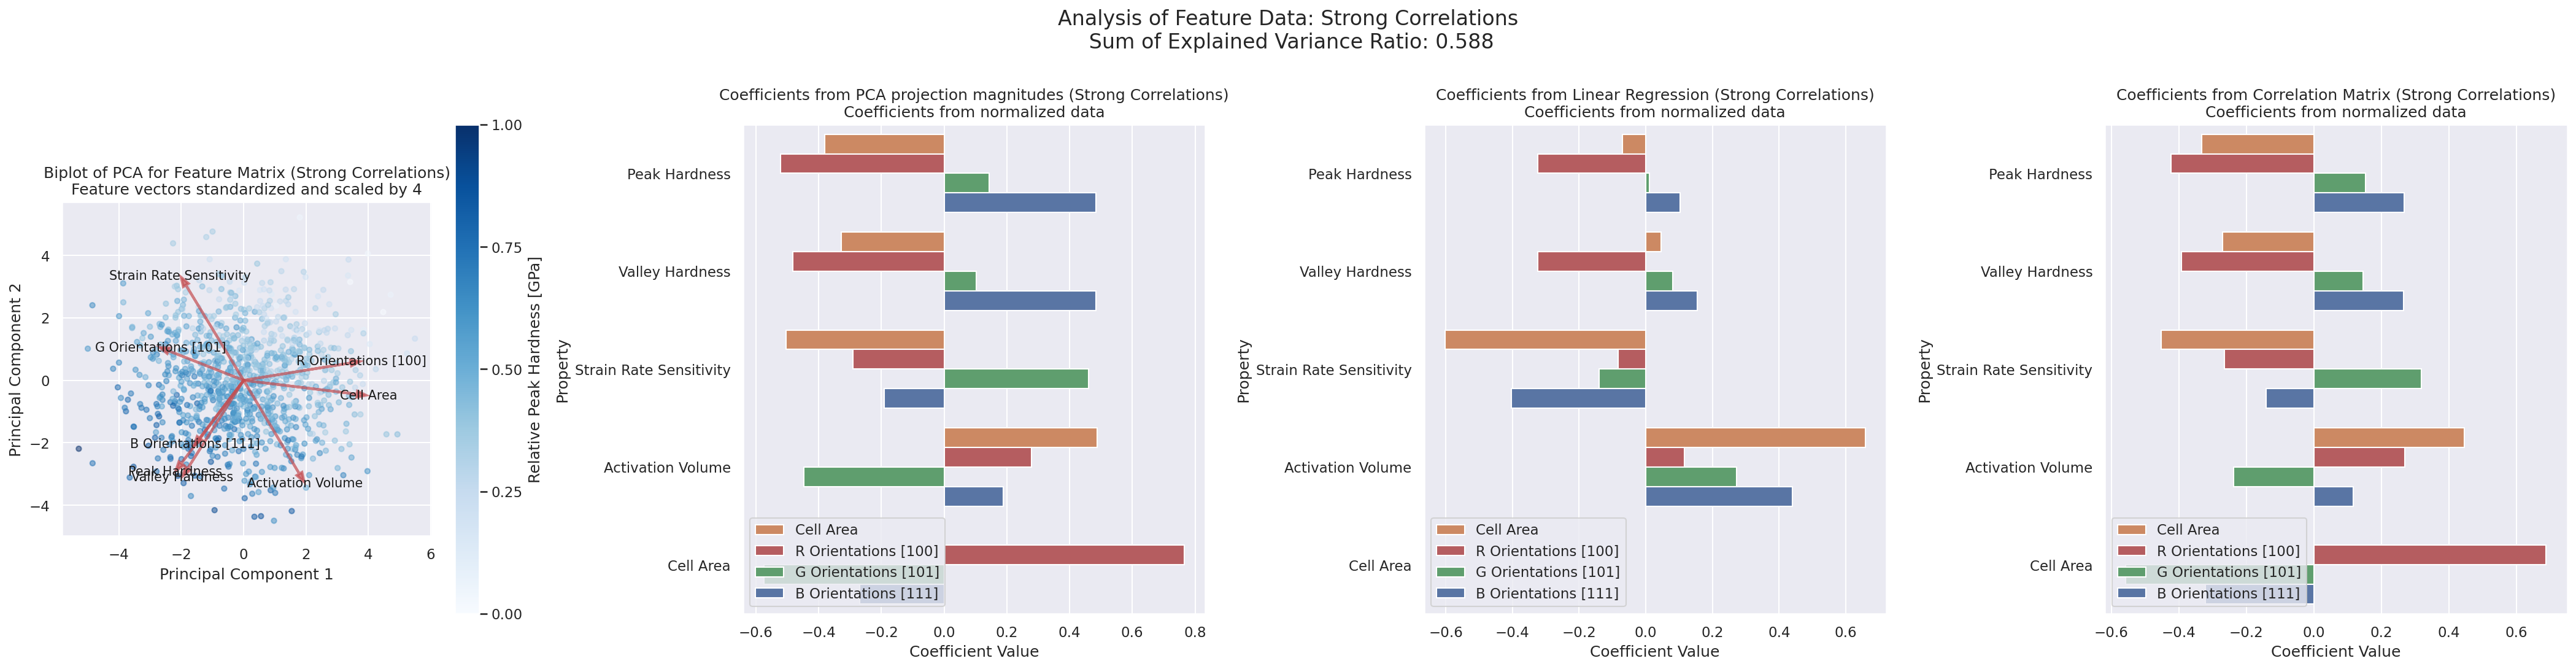

Analyzing Mild Correlations, 1000 datapoints
Sklearn Explained Variance Ratio: [0.15032893 0.1477573 ]
Sklearn Explained Variance Ratio Sum: 0.2980862316217412


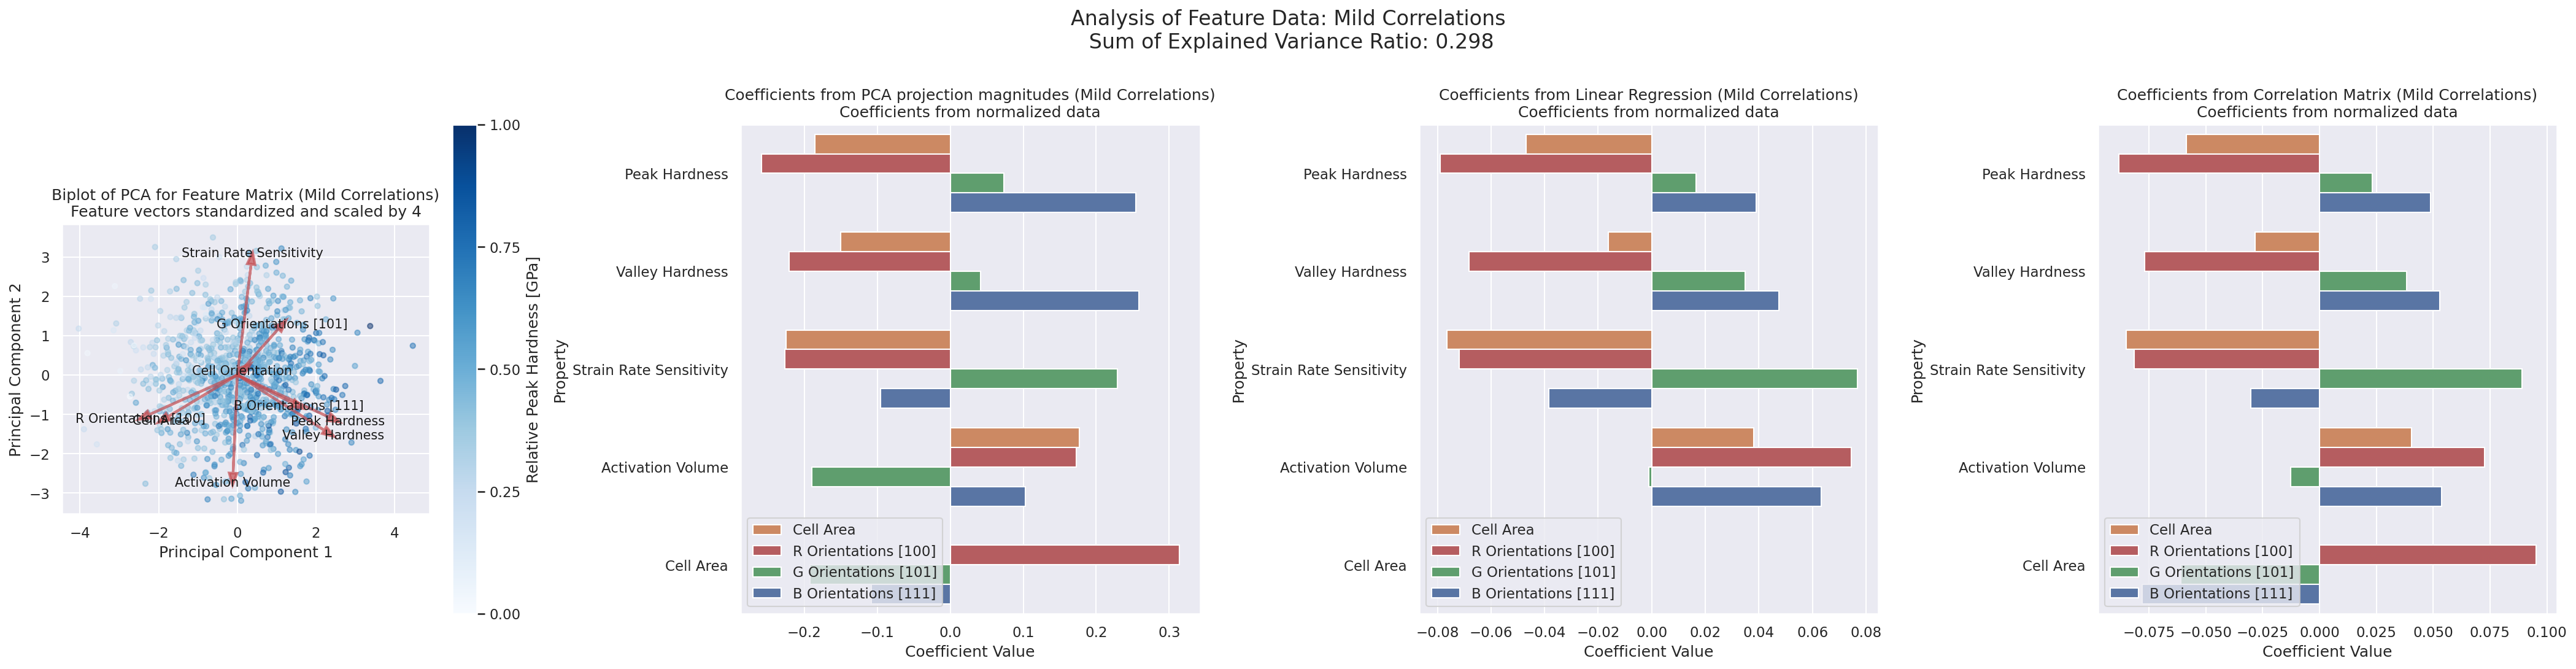

In [133]:
# Run the analysis on the feature data with strong and mild correlations
#
###############################################################################

data_labels = ['Strong Correlations', 'Mild Correlations']
data_sets = [feature_data_strong, feature_data_mild]

for data_label, data_set in zip(data_labels, data_sets):
    run_analysis_on_feature_data(data_set, data_label)

### C) PCA on synthetic data and random data

Examining the PCA biplot for the synthetic data modeled after experimental conditions, we observe a resemblance to the biplots generated from the strong and mild correlation datasets. The projection magnitudes and regression coefficients are more reflective of the values from the correlation matrix, indicating a consistency in the relationships captured by the PCA.

Interestingly, the linear regression coefficients tend to exhibit a dominant property with a disproportionately high coefficient value compared to others, whereas the projection and correlation matrix coefficients display a more uniform distribution. This disparity suggests that linear regression may emphasize the contribution of a single feature more heavily than PCA, which considers orthogonal directions of variance in the data.

Turning our attention to the dataset with random correlations, the biplot shows a more uniform distribution of feature vectors across various angles, which aligns with our expectations for a dataset with no intrinsic correlation pattern. Notably, the Cell Area and Peak Hardness vectors, which were intentionally correlated, are indeed in close proximity within the biplot. All methods—PCA projections, linear regression, and correlation matrix—capture this positive correlation, demonstrating their ability to identify strong feature relationships.

However, the agreement between the methods diminishes for other features, underscoring that significant alignment across different methods may signal the presence of genuine correlations. The variance in agreement highlights the random nature of the dataset and indicates that discerning valid correlations requires a multifaceted approach.

Analyzing UCSB Synthetic Correlations, 1000 datapoints
Sklearn Explained Variance Ratio: [0.3020025 0.2570649]
Sklearn Explained Variance Ratio Sum: 0.5590674020667945


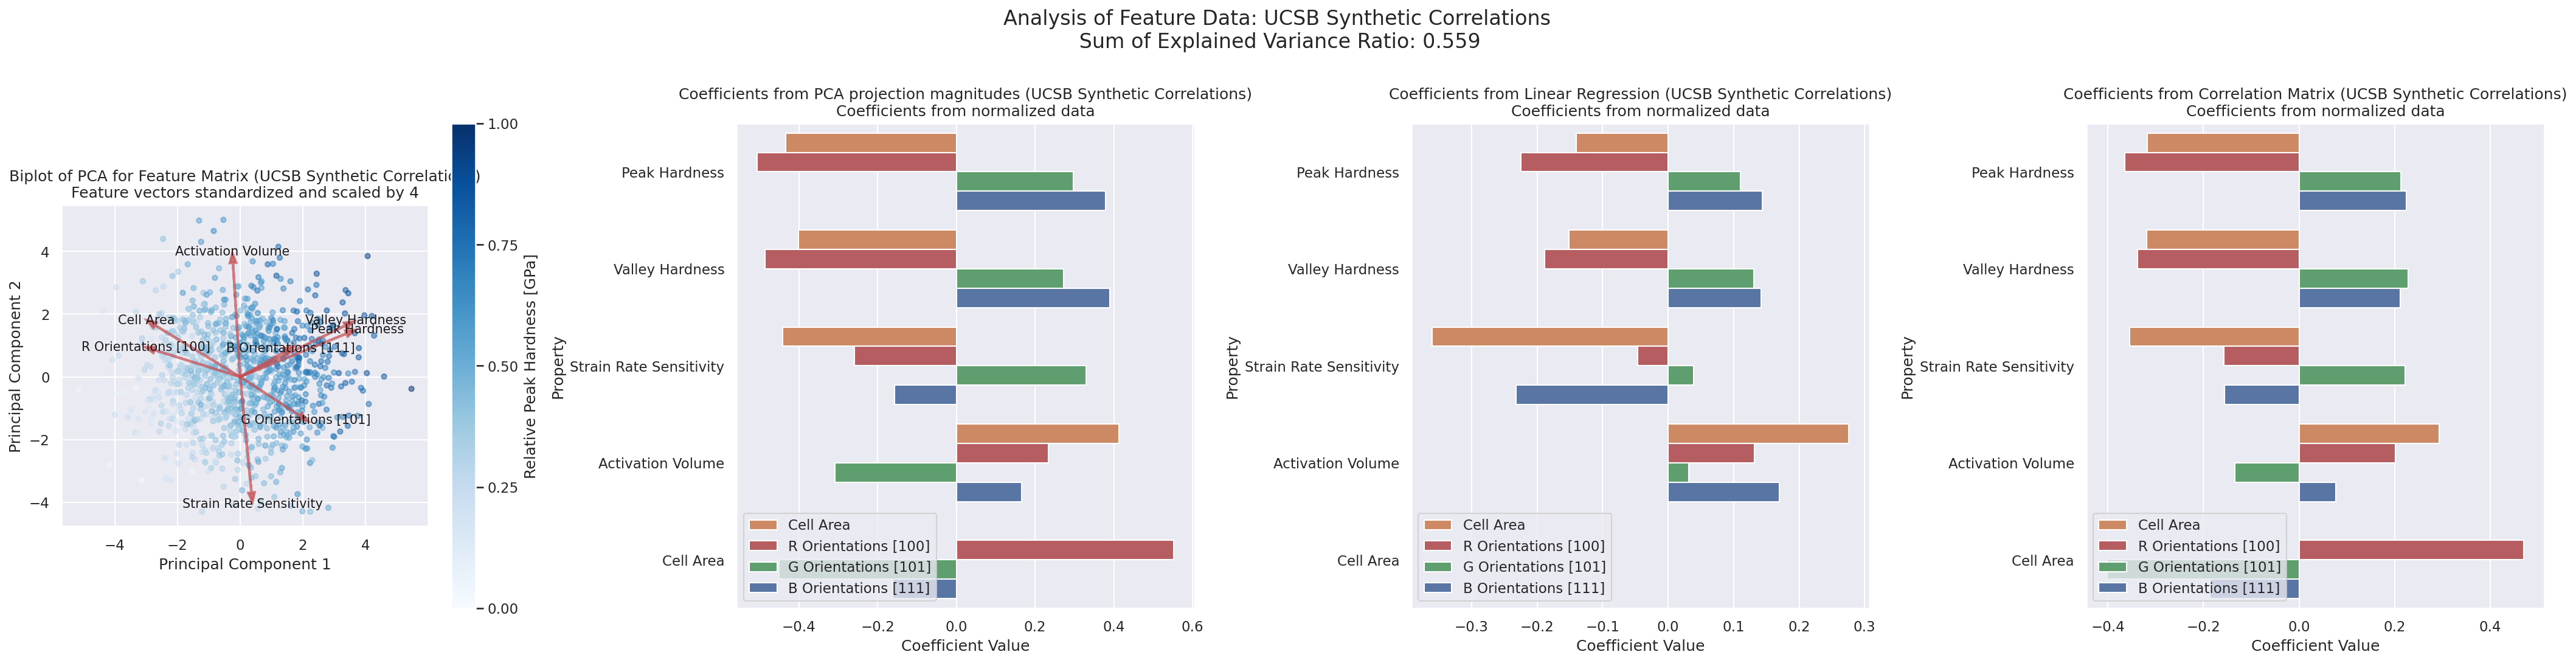

Analyzing Random Correlations, 1000 datapoints
Sklearn Explained Variance Ratio: [0.26291134 0.23183853]
Sklearn Explained Variance Ratio Sum: 0.49474987502525314


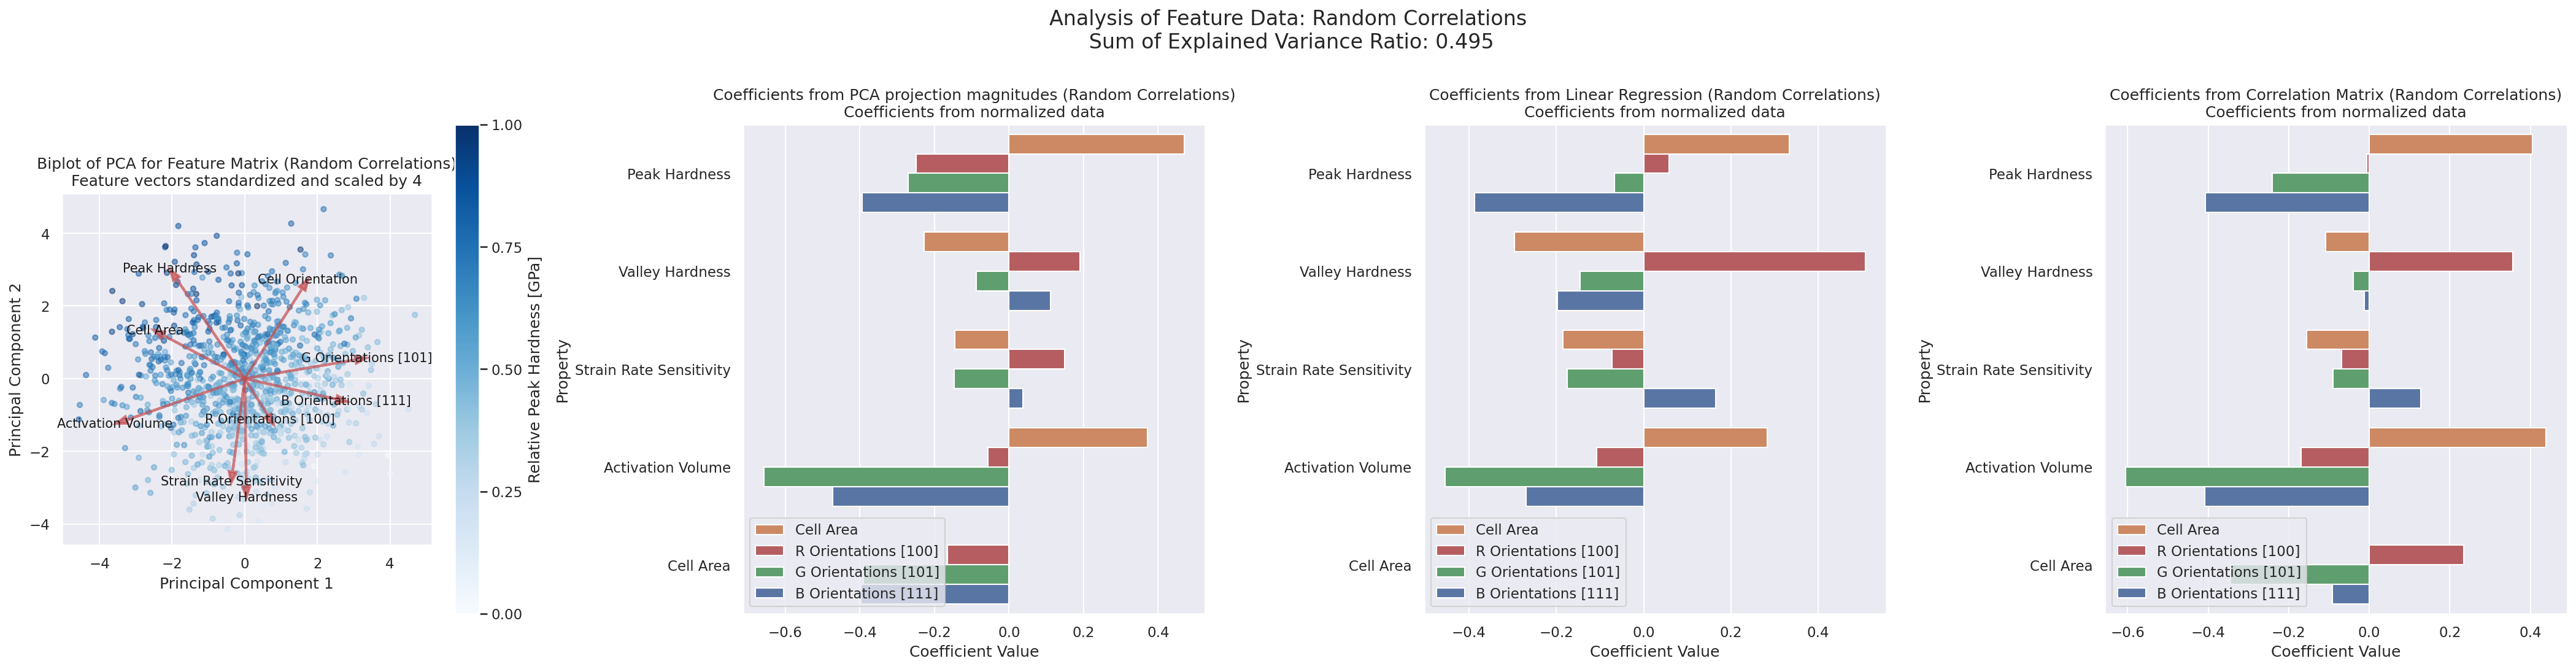

In [134]:
# Run the analysis on the synthetic and random data
#
###############################################################################

data_labels = ['UCSB Synthetic Correlations', 'Random Correlations']
data_sets = [feature_data_true, feature_data_random]

for idx, data in enumerate(data_sets):
    run_analysis_on_feature_data(data, data_labels[idx])

---
## 5. PCA on experimental data

We now turn our focus to the experimental data, ensuring that the labels correspond to the terms used in previous analyses. The dataset distinguishes between data points collected by two researchers, Carl and Nicolò, with Carl's data corresponding to the sample side perpendicular to the printing direction, and Nicolò's to the parallel side. Our investigation will compare the PCA results for both sample orientations, starting with the parallel and then examining the perpendicular side.

### Parallel to Print Direction Analysis

This dataset only contains 21 data points, which we keep in mind may limit the robustness of any conclusions. Initial observations reveal a positive correlation between 'B Orientations [111]' and both peak and valley hardnesses. This aligns with expectations as indentations in an FCC material in the direction of the normal vector of the most densely packed plane should indeed be harder. A notable negative correlation with 'R Orientations [100]' and a lesser correlation with 'G Orientations [101]' suggest that the [100] plane orientations may play a more significant role than [101] orientations. Furthermore, a slight negative correlation emerges between dislocation cell area and hardness, hinting an interplay between these microstructural features and mechanical properties. The negative correlation is also supported by Hall-Petch-theory, as smaller cells leads to an increase in the volume fraction of cell boundaries, which hinders dislocation movement and therefore increases hardness. 

While crystal orientation seems less decisive for strain rate sensitivity, with discrepancies among the coefficient extraction methods, one trend is noticable; 'Cell Area' exhibits a stronger relative importance for strain rate sensitivity (and inversely for activation volume due to their reciprocal relationship) than for hardness.

Examining 'Cell Area' one can discern positive correlations with 'R Orientations [100]' and 'B Orientations [111]' and a marked negative correlation with 'G Orientations [101],' suggesting an orientation away from the [101] corner on the Inverse Pole Figure (IPF) map.

### Perpendicular to Print Direction Analysis

The perpendicular side, with a dataset of 64 points, echoes the positive correlation between hardness and 'B Orientations [111]', and to some extent 'G Orientations [101]', with a pronounced negative correlation with Cell area, which assumes greater relative importance for hardness compared the orientation features. The presence of a small positive correlation between 'Cell Area' and Strain rate sensitivity is again evident, though the importance of orientations remains contentious between the three methods. The interpretation of universally positive or negative orientation features suggests a more central positioning on the IPF color key as RGB-values corresponding to both $[1, 1, 1]$ and $[-1, -1, -1]$ would map to the center. The Activation Volume correlations are less conclusive due to inconsistent findings across methods. Notably, the 'R Orientations [100]' feature maintains a positive correlation with Cell area, while 'B Orientations [111]' presents a considerable negative, and 'G Orientations [101]' a smaller negative correlation, indicating a proximity to the [100]-[111] axis on the IPF map.

### Comparative Analysis of Sample Sides

Comparing the two sample orientations, there is a consensus on the signs of feature correlation coefficients for hardness properties, except for 'G Orientations [101]'. The distinction lies in the relative importance of 'Cell Area' versus crystal orientation. For strain rate sensitivity, an intriguing divergence appears; on the parallel surface, 'Cell Area' is less important for hardness but more so for strain rate sensitivity, whereas on the perpendicular surface, its correlation with strain rate sensitivity is positive but less pronounced than with hardness. Additionally, the differences in the sign of the coefficients for 'B Orientations [111]' correlations with 'Cell Area' are noteworthy between the sample orientations, indicating a difference in cell textures between the two surfaces.

In [135]:
# Function for loading experimental data file
#
###############################################################################

def get_UCSB_feature_data(measurement_labels_to_keep = ['Carl', 'Nicolo']):

    data_folder_path = 'data/'

    # Merged results file is of format:
    # Label,Array_Index,Indentation_Number,PEAK_HARDNESS_AVERAGE,PEAK_HARDNESS_STD,VALLEY_HARDNESS_AVERAGE,VALLEY_HARDNESS_STD,STRAIN_RATE_SENSITIVITY,STRAIN_RATE_SENSITIVITY_STD,ACTIVATION_VOLUME,ACTIVATION_VOLUME_STD,Area Mean,Area Std,equivalent_diameter Mean,equivalent_diameter Std,orientation Mean 0,orientation Std 0,orientation Mean 1,orientation Std 1,Aspect Ratio Mean,Aspect Ratio Std,orientation Mean 2,orientation Std 2,Crystal Type,euler_angle_max,euler_angle_std,euler_angle_2nd_max,euler_angle_2nd_std,mode_euler_angle,prob_threshold
    # Carl,1,1,,,,,,,,,6.81467254338432,8.986775414581542,2.358907795521309,1.7641611544546216,-42.251961090263904,5.794865343364701,57.18668851996319,13.813814605260026,4.714804260850211,4.779778845895971,,,Double Crystal,[247.75606351  84.97143581   2.70051052],[1.18135587 1.53915984 0.50904631],[ 72.83859183   0.         355.49235154],[0.95803521 0.         0.90539715],[247  85 355],0.05
    
    results_df = pd.read_csv(data_folder_path + 'feature_matrix.csv')
    results_df = results_df[results_df['Label'].isin(measurement_labels_to_keep)]

    label_matrix    = results_df[['Label', 'Array_Index', 'Indentation_Number']]
    feature_data_UCSB = results_df[['PEAK_HARDNESS_AVERAGE', 'VALLEY_HARDNESS_AVERAGE', 'STRAIN_RATE_SENSITIVITY', 'ACTIVATION_VOLUME', 'Area Mean', 'R_Max', 'G_Max', 'B_Max']]

    # Rename columns
    new_column_names = ['Peak Hardness', 'Valley Hardness', 'Strain Rate Sensitivity', 'Activation Volume', 'Cell Area', 'R Orientations [100]', 'G Orientations [101]', 'B Orientations [111]']
    feature_data_UCSB.columns = new_column_names
    
    return feature_data_UCSB, label_matrix

Analyzing UCSB Para. to print, 21 datapoints
Sklearn Explained Variance Ratio: [0.41819144 0.22104109]
Sklearn Explained Variance Ratio Sum: 0.6392325334658768


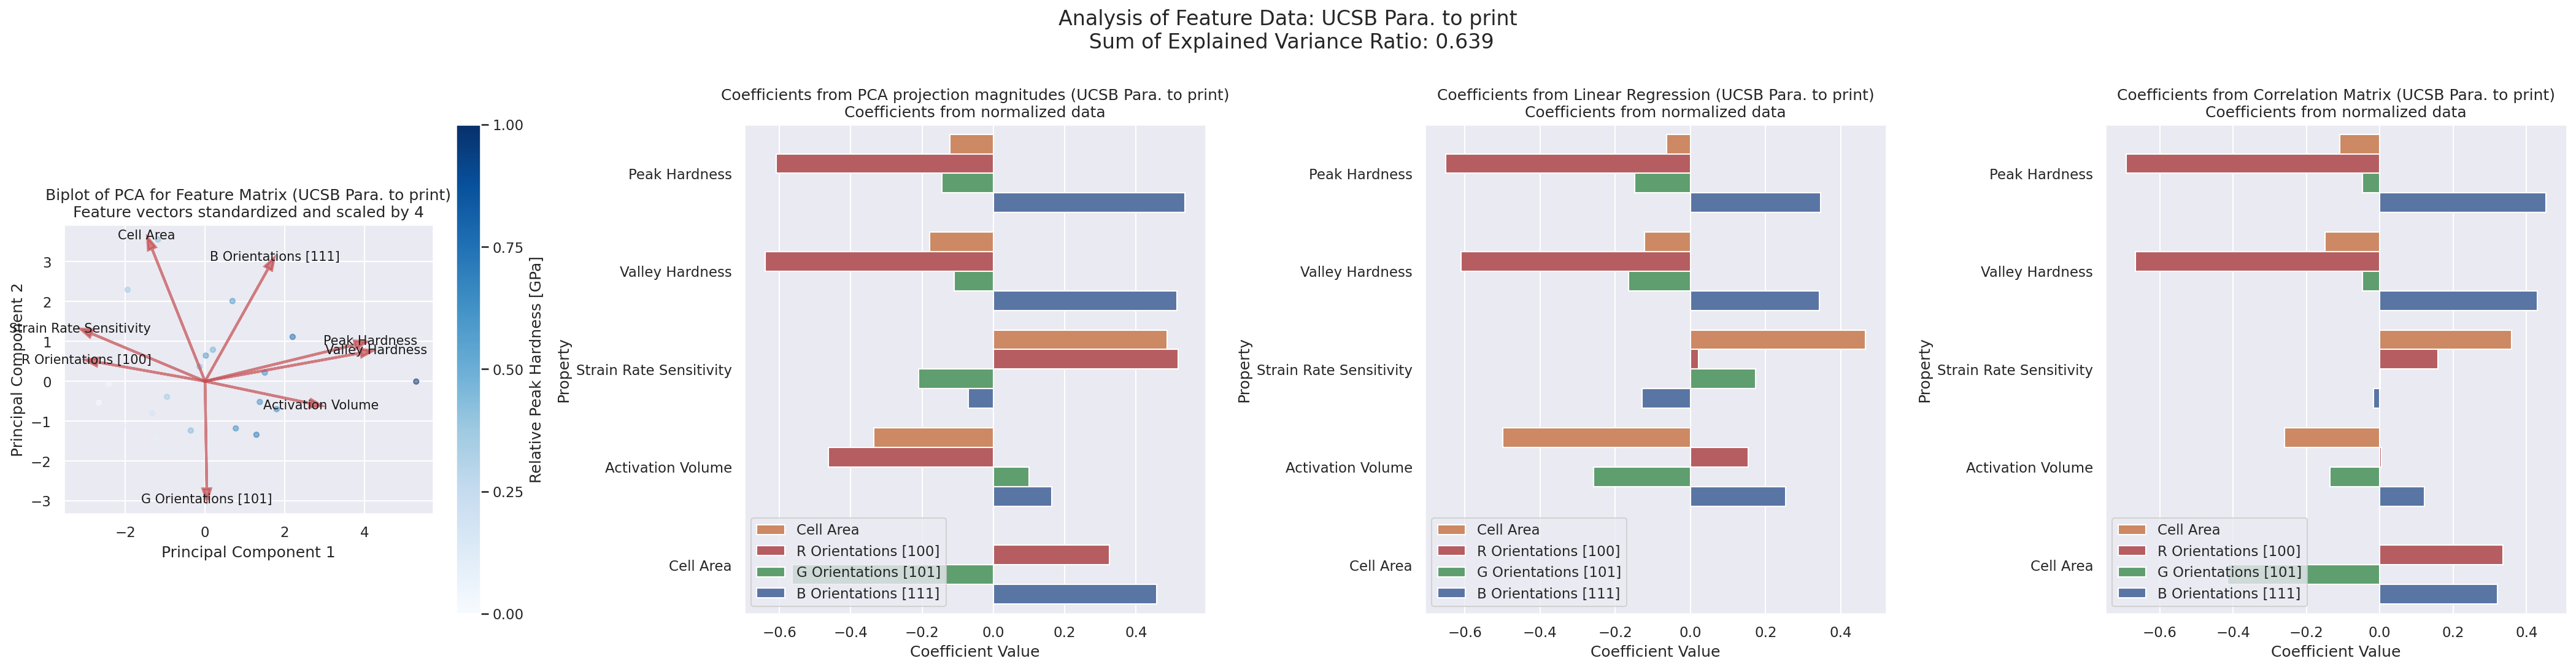

Analyzing UCSB Perp. to print, 64 datapoints
Sklearn Explained Variance Ratio: [0.38710592 0.24292684]
Sklearn Explained Variance Ratio Sum: 0.6300327610711729


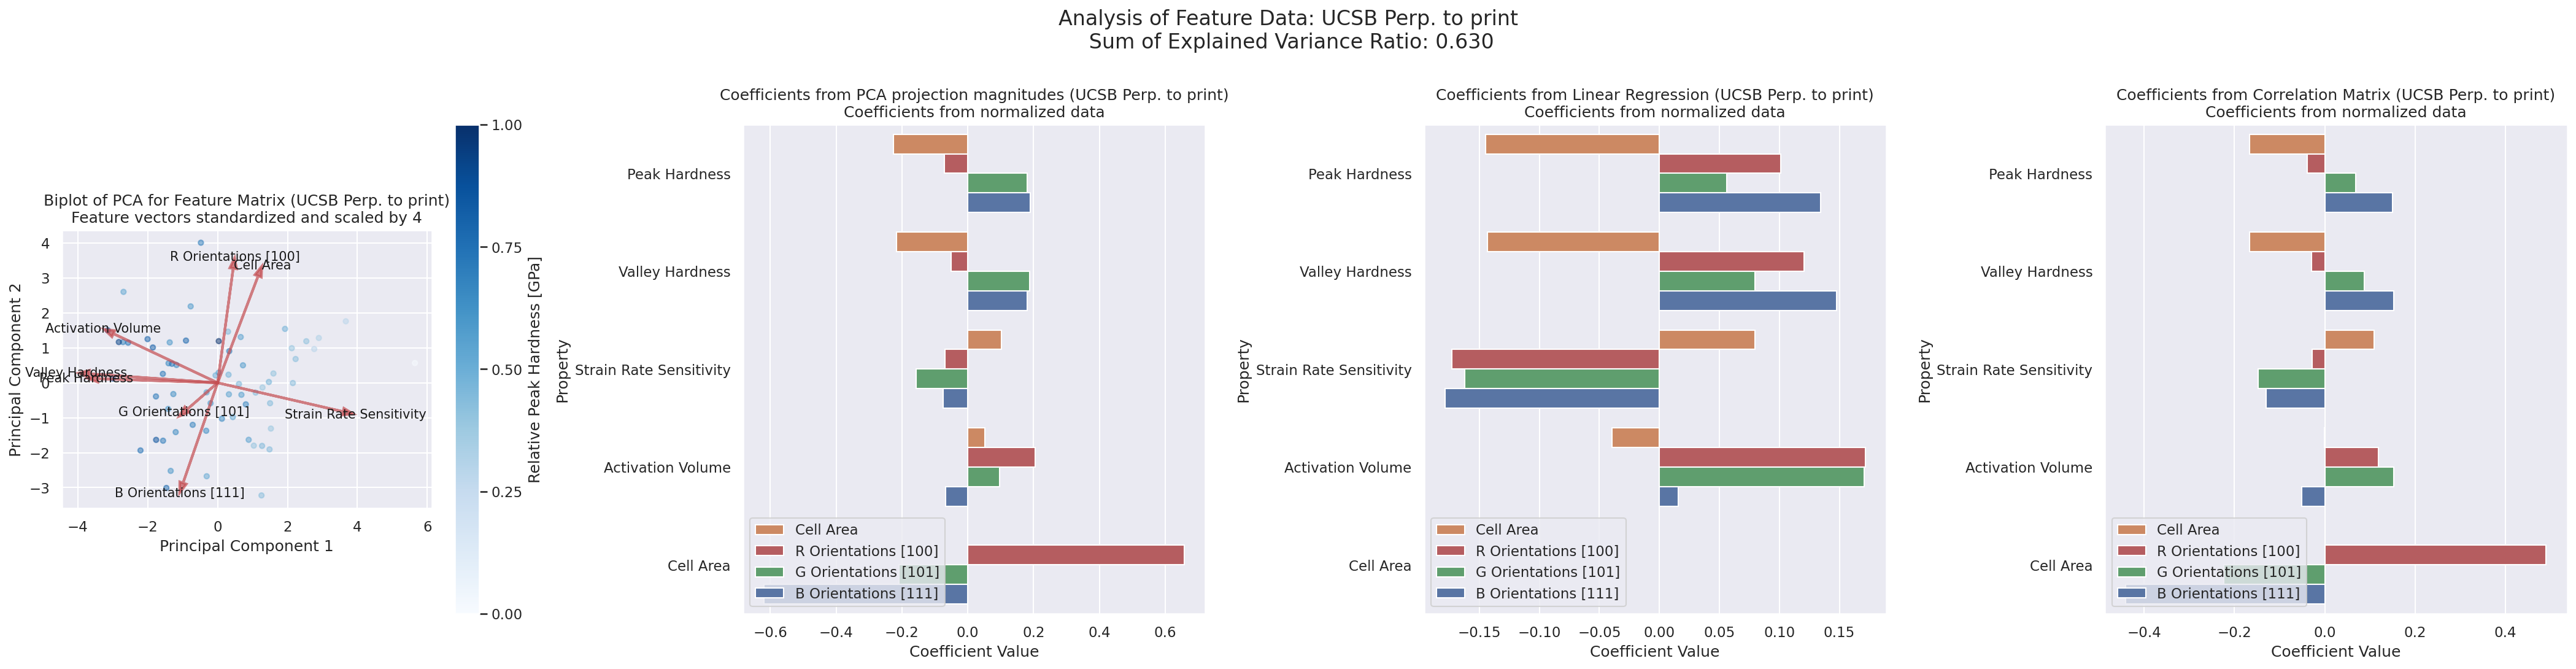

In [136]:
feature_data_UCSB_carl, label_matrix = get_UCSB_feature_data(measurement_labels_to_keep = ['Carl'])
feature_data_UCSB_nicolo, label_matrix = get_UCSB_feature_data(measurement_labels_to_keep = ['Nicolo'])

data_labels = ['UCSB Para. to print', 'UCSB Perp. to print']
data_sets = [feature_data_UCSB_nicolo, feature_data_UCSB_carl]

for data_label, data_set in zip(data_labels, data_sets):
    run_analysis_on_feature_data(data_set, data_label)


## 7. Future improvements

The application of Principal Component Analysis (PCA) in this study has been kept within the limits of conventional standards, yet there remains some room for refinements within these constraints. One immediate possibility would be the exploration of a three-component PCA, replacing the biplot with a triplot. An initial preliminary attempt at this approach suggested an increase in the explained variance from 60% to 80%, but the implementation was set aside to concentrate on a two-dimensional PCA approach and the theory behind it for a more clear report. The main benefit at this stage would be to validate whether the projection magnitude coefficients remain consistent in the larger principal component space.

Another critical aspect to consider is PCA’s limitation to linear relationships. It is crucial to establish the validity of linear approximations for the material relationships we have attempted to examine. For instance, identifying the ranges within which the ratio between peak and valley hardness correlates linearly with strain rate sensitivity would be valuable. Likewise, the Hall-Petch relationship between dislocation cells and hardness following a linear relationship should be confirmed to steer clear of ranges where the inverse Hall-Petch might dominate. 

Further enhancements in data analysis will likely hinge upon improvements in the dataset itself. Enhanced precision in orientation measurements and more sophisticated image processing for dislocation cells would likely lead to stronger and more detailed correlations.

Apart from PCA, alternative analytical techniques could offer additional insights. Support Vector Machines (SVM) could be leveraged to classify data with complex distributions, and Kernel-PCA offers a promising avenue to capture non-linear relationships that conventional PCA cannot, potentially uncovering new patterns within the data.